<a href="https://colab.research.google.com/github/Kuzay3t/2D-Image-Reconstruction/blob/main/2dimage_reconstruction_cfair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconstructing CiFair 2D image using tensorflow

In [23]:
# importing necessary libaries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [13]:
# loading images

(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [14]:
# adding noise to the image

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [15]:
# building the cnn encoder
input_img = layers.Input(shape=(32, 32, 3))

In [16]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [17]:
# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [18]:
# Compile model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [19]:
# train the model
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 359ms/step - loss: 0.5957 - val_loss: 0.5686
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 333ms/step - loss: 0.5674 - val_loss: 0.5663
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 136s 318ms/step - loss: 0.5650 - val_loss: 0.5650
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 322ms/step - loss: 0.5640 - val_loss: 0.5644
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 328ms/step - loss: 0.5633 - val_loss: 0.5638
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 314ms/step - loss: 0.5626 - val_loss: 0.5633
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 127s 324ms/step - loss: 0.5632 - val_loss: 0.5631
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 330ms/step - loss: 0.5621 - val_loss: 0.5628
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 141s 329ms/step - loss: 0.5620 - val_loss: 0.5624
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 135s 345ms/step - loss: 0.5612 - val_loss: 0.5623


In [20]:
# visualizing the results
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


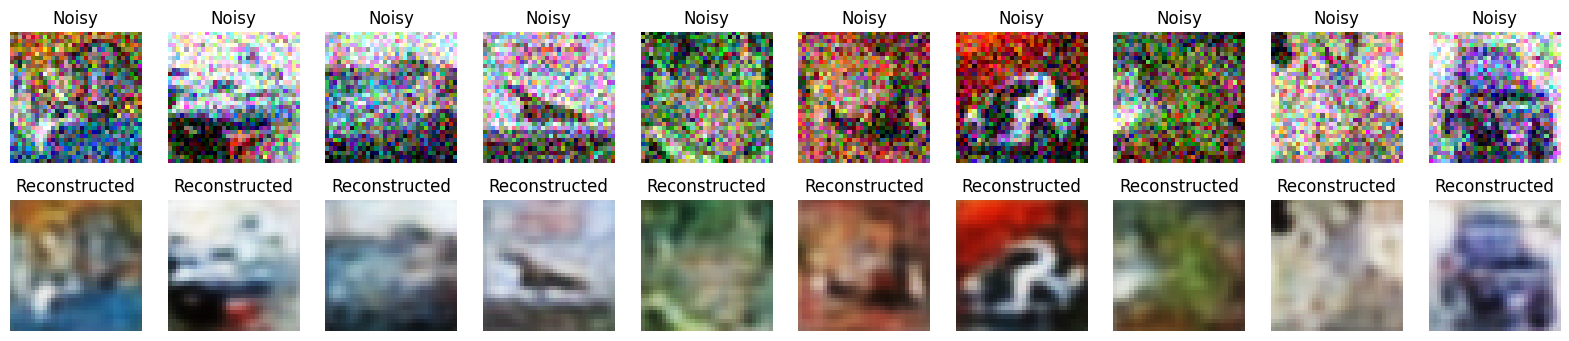

In [21]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

      # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

In [24]:
mse_score = mean_squared_error(x_test.reshape(-1, 3072), decoded_imgs.reshape(-1, 3072))
print("CIFAR-10 Reconstruction MSE:", mse_score)

CIFAR-10 Reconstruction MSE: 0.005467916373163462
